# Author: Na Qian
# Purpose: Logistic Regression Predict Transaction

# Import all libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pylab import rcParams
import warnings


# Acquire the data

In [2]:
transaction_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vThJCOGUbc3DZfvDn21-WxImNlWUC-WN-JHmsbaZ3QS3jGbBnpi-jjI7rS09ZFf7rH0zi4l6e_R8f-c/pub?gid=2137565732&single=true&output=csv')
transaction_df.head()

,row,transaction,salary_usd,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
0,653,0,25000,1,0,0,0,0,0,1,0,1,0,1,0,0
1,546,0,7000,0,0,0,0,0,0,1,1,1,1,1,0,0
2,463,0,25000,1,0,0,1,0,0,1,1,1,0,1,1,0
3,93,1,124000,0,1,1,1,0,0,0,0,0,1,1,0,0
4,672,1,84000,0,1,0,1,0,0,0,1,0,1,1,0,0


In [37]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   row                                  505 non-null    int64
 1   transaction                          505 non-null    int64
 2   salary_usd                           505 non-null    int64
 3   is_male                              505 non-null    int64
 4   is_married                           505 non-null    int64
 5   is_college                           505 non-null    int64
 6   is_professional                      505 non-null    int64
 7   is_senior                            505 non-null    int64
 8   is_employed                          505 non-null    int64
 9   is_single_income                     505 non-null    int64
 10  children_present                     505 non-null    int64
 11  is_renter                            505 non-null    int64

# Describe numerical variable

In [38]:
transaction_df['salary_usd'].describe()

count       505.000000
mean      58223.762376
std       39098.058320
min           0.000000
25%       25000.000000
50%       55000.000000
75%       86000.000000
max      124000.000000
Name: salary_usd, dtype: float64

# Describe dummy variables

In [39]:
transaction_df.drop(['salary_usd','row'],axis=1).describe()

,transaction,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.186139,0.443564,0.366337,0.308911,0.352475,0.063366,0.029703,0.762376,0.364356,0.605941,0.673267,0.900990,0.075248,0.079208
std,0.389604,0.497297,0.482281,0.462502,0.478215,0.243862,0.169935,0.426049,0.481726,0.489132,0.469484,0.298971,0.264052,0.270331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Graph plot

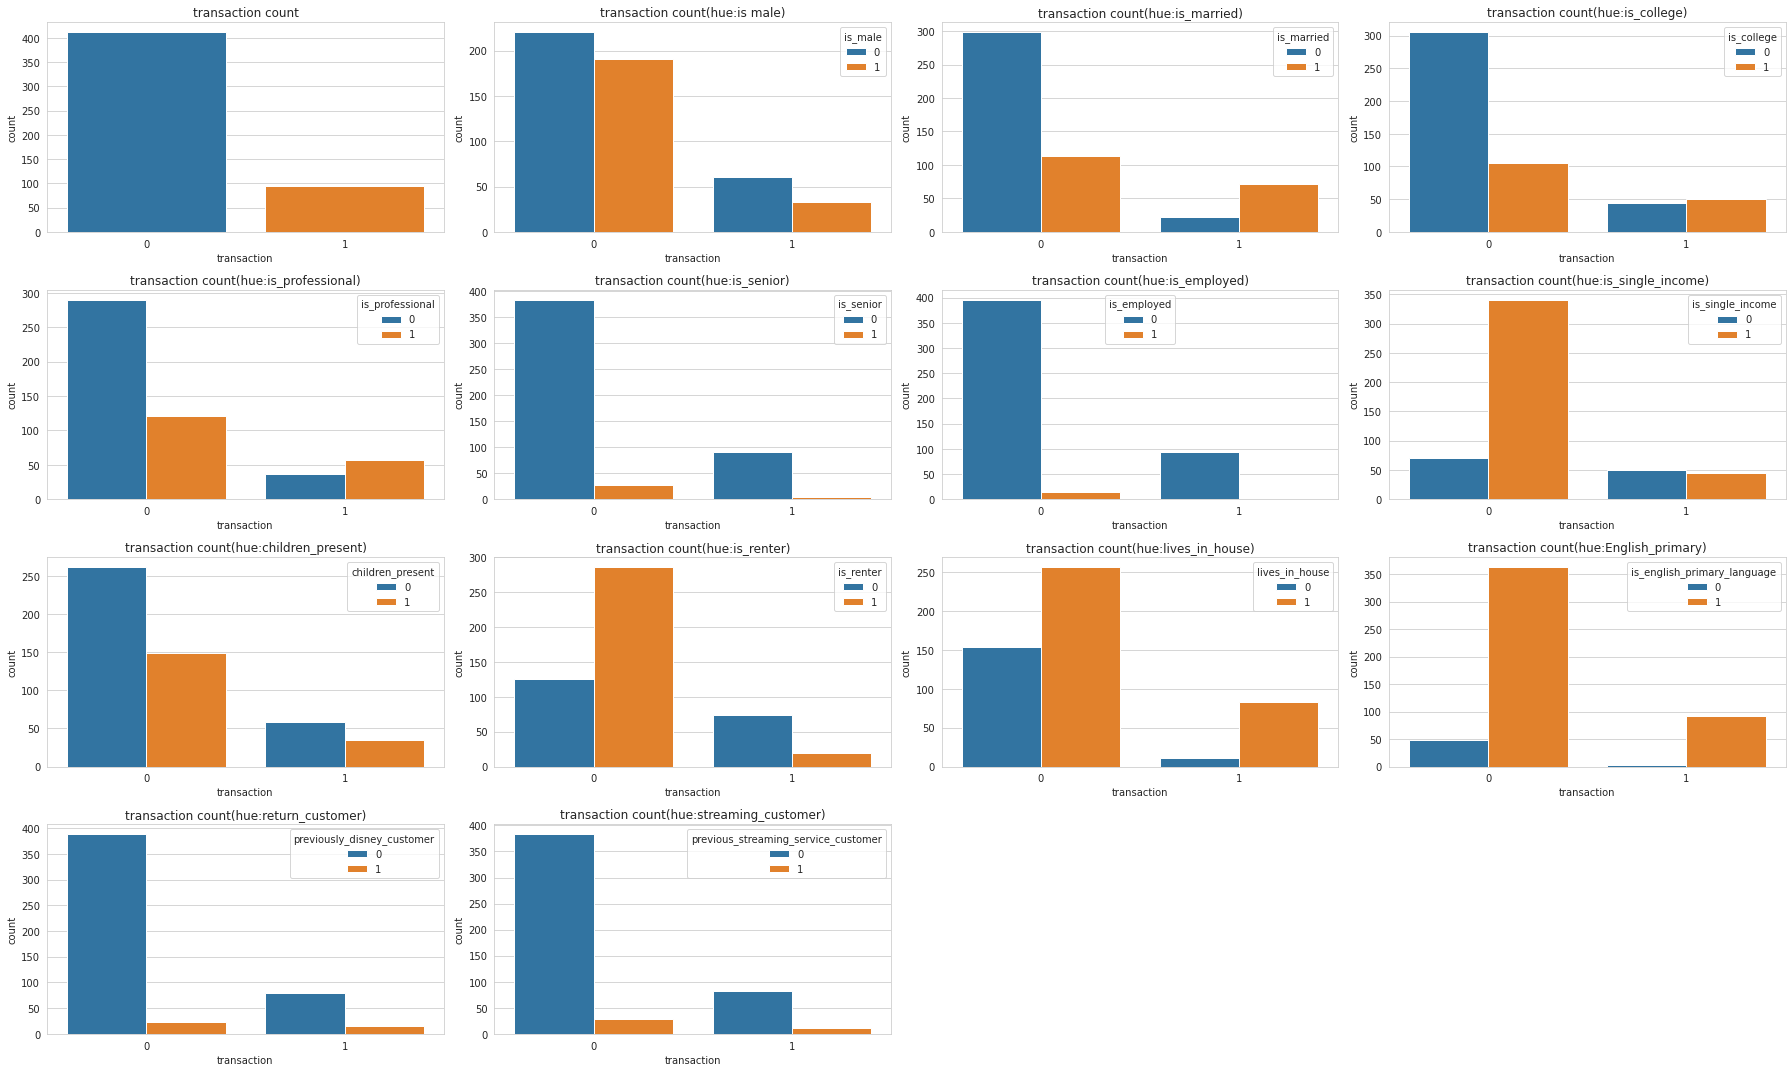

In [0]:
#use plot to visulize the factors that effect on disney purchase
rcParams['figure.figsize'] = (25,15)
plt.subplot(4,4,1)
sns.countplot(x='transaction',data=transaction_df)
plt.title('transaction count')
plt.subplot(4,4,2)
sns.countplot(x='transaction', hue = 'is_male',data=transaction_df)
plt.title('transaction count(hue:is male)')
plt.subplot(4,4,3)
sns.countplot(x='transaction', hue = 'is_married',data=transaction_df)
plt.title('transaction count(hue:is_married)')
plt.subplot(4,4,4)
sns.countplot(x='transaction', hue = 'is_college',data=transaction_df)
plt.title('transaction count(hue:is_college)')
plt.subplot(4,4,5)
sns.countplot(x='transaction', hue = 'is_professional',data=transaction_df)
plt.title('transaction count(hue:is_professional)')
plt.subplot(4,4,6)
sns.countplot(x='transaction', hue = 'is_senior',data=transaction_df)
plt.title('transaction count(hue:is_senior)')
plt.subplot(4,4,7)
sns.countplot(x='transaction', hue = 'is_employed',data=transaction_df)
plt.title('transaction count(hue:is_employed)')
plt.subplot(4,4,8)
sns.countplot(x='transaction', hue = 'is_single_income',data=transaction_df)
plt.title('transaction count(hue:is_single_income)')
plt.subplot(4,4,9)
sns.countplot(x='transaction', hue = 'children_present',data=transaction_df)
plt.title('transaction count(hue:children_present)')
plt.subplot(4,4,10)
sns.countplot(x='transaction', hue = 'is_renter',data=transaction_df)
plt.title('transaction count(hue:is_renter)')
plt.subplot(4,4,11)
sns.countplot(x='transaction', hue = 'lives_in_house',data=transaction_df)
plt.title('transaction count(hue:lives_in_house)')
plt.subplot(4,4,12)
sns.countplot(x='transaction', hue = 'is_english_primary_language',data=transaction_df)
plt.title('transaction count(hue:English_primary)')
plt.subplot(4,4,13)
sns.countplot(x='transaction', hue = 'previously_disney_customer',data=transaction_df)
plt.title('transaction count(hue:return_customer)')
plt.subplot(4,4,14)
sns.countplot(x='transaction', hue = 'previous_streaming_service_customer',data=transaction_df)
plt.title('transaction count(hue:streaming_customer)')


plt.tight_layout()

Some information can be interpreted from above graphs:

marriage status, profession, age, employee status, house ownership, language are factors that significant influence the transaction.

columns: is_male, children_present, previously_disney_customer,  previous_streaming_service_customer did not obviously influence the transaction, and will be drop when doing logistic regression

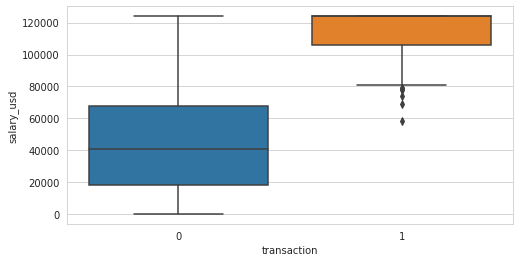

In [0]:
#use boxplot to visulize the how salary effect on transaction
rcParams['figure.figsize'] = (10,5)
sns.boxplot(x='transaction',y='salary_usd',data=transaction_df)

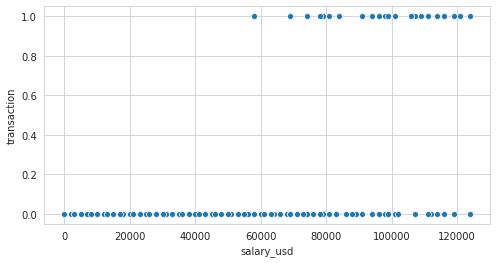

In [0]:
#sactter plot show the relationship between transaction and salary
sns.scatterplot(x='salary_usd',y='transaction',data=transaction_df)

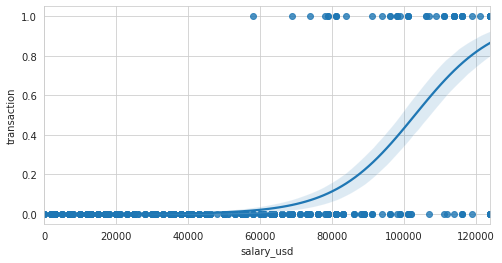

In [0]:
sns.regplot(x='salary_usd', y='transaction', data=transaction_df, logistic=True)

Information get from the boxplot and scatter plot:

The income significantly influences the transcation

People who make purchase usually have higher salary

# Logistic Regression

In [0]:
transaction_df.drop('row',axis=1,inplace=True)

In [0]:
transaction_df.head(1)

,transaction,salary_usd,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
0,0,25000,1,0,0,0,0,0,1,0,1,0,1,0,0


In [0]:
X2=transaction_df.drop(['transaction','is_male','children_present','previous_streaming_service_customer','previously_disney_customer'],axis=1)
y2=transaction_df['transaction']

In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=101)

In [0]:
transaction_model = LogisticRegression()

In [0]:
transaction_model.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#the score of this model
transaction_model.score(X2_test, y2_test)

0.8818897637795275

In [0]:
# make dataframe to show the predictions and probabilities
prediction_df2 = pd.DataFrame(transaction_model.predict(X2_test), columns = {'Prediction'}).set_index([pd.Index(X2_test.index)])
probability_df2 = pd.DataFrame(transaction_model.predict_proba(X2_test)).set_index([pd.Index(X2_test.index)])
all_together_df2 = X2_test.join(y2_test).join(prediction_df2).join(probability_df2)
all_together_df2

,salary_usd,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,is_renter,lives_in_house,is_english_primary_language,transaction,Prediction,0,1
18,3000,0,0,0,0,0,0,1,0,1,0,0,0.996820,0.003180
194,124000,1,1,0,1,0,1,0,1,1,1,1,0.454368,0.545632
104,89000,0,0,1,0,0,1,0,1,1,0,0,0.685030,0.314970
4,84000,1,0,1,0,0,0,0,1,1,1,0,0.619379,0.380621
157,48000,1,0,0,1,0,1,0,1,1,0,0,0.991012,0.008988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,64000,1,1,1,0,0,1,1,0,1,0,0,0.985374,0.014626
479,45000,0,0,0,0,0,1,1,0,1,0,0,0.985842,0.014158
274,23000,0,1,0,0,0,1,1,0,1,0,0,0.997940,0.002060
365,71000,0,0,0,0,0,1,1,0,1,0,0,0.919259,0.080741


# Arbitrary value predictions

In [0]:
#make arbitrary variables
arbitrary_values2 = pd.DataFrame(data={'salary_usd':[0,5000,120000,50000,150000],'is_married':[1,0,0,1,0],'is_college':[1,1,1,0,1],'is_professional':[1,0,0,0,0],'is_senior':[0,1,1,0,1],'is_employed':[1,1,0,0,1],'is_single_income':[0,0,1,0,0],'is_renter':[0,1,1,0,1],'lives_in_house':[1,1,0,0,1],'is_english_primary_language':[1,0,0,1,1]})


In [0]:
arbitrary_values2

,salary_usd,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,is_renter,lives_in_house,is_english_primary_language
0,0,1,1,1,0,1,0,0,1,1
1,5000,0,1,0,1,1,0,1,1,0
2,120000,0,1,0,1,0,1,1,0,0
3,50000,1,0,0,0,0,0,0,0,1
4,150000,0,1,0,1,1,0,1,1,1


In [0]:
#make predictions
pd.DataFrame(transaction_model.predict(arbitrary_values2))

,0
0,0
1,0
2,1
3,0
4,1


In [0]:
# make dataframe to show the predictions and probabilities
arbitrary_values2_pred=pd.DataFrame(transaction_model.predict(arbitrary_values2),columns=['prediction'])
arbitrary_values2_pred_prob=pd.DataFrame(transaction_model.predict_proba(arbitrary_values2))
arbitrary_values2_pred_alltogether = pd.concat([arbitrary_values2,arbitrary_values2_pred_prob,arbitrary_values2_pred],axis=1)

In [0]:
arbitrary_values2_pred_alltogether

,salary_usd,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,is_renter,lives_in_house,is_english_primary_language,0,1,prediction
0,0,1,1,1,0,1,0,0,1,1,0.998929,0.001071,0
1,5000,0,1,0,1,1,0,1,1,0,0.997041,0.002959,0
2,120000,0,1,0,1,0,1,1,0,0,0.127704,0.872296,1
3,50000,1,0,0,0,0,0,0,0,1,0.844935,0.155065,0
4,150000,0,1,0,1,1,0,1,1,1,0.072905,0.927095,1


# Logistic Regression model evaluate

In [0]:
#make confusion matrix
con_mat2 = confusion_matrix(y2_test,predictions2)

In [0]:
con_mat2

array([[100,   3],
       [ 10,  14]])

Text(0.5, 15.0, 'Predicted label')

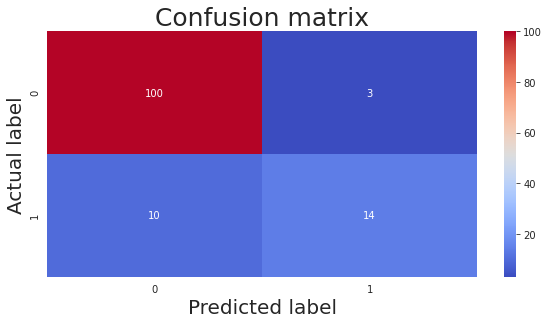

In [0]:
#Visualizing Confusion Matrix using Heatmap
rcParams['figure.figsize'] = (8,4)
sns.heatmap(pd.DataFrame(con_mat2), annot=True, cmap="coolwarm",fmt='g')
plt.tight_layout()
plt.title('Confusion matrix',fontsize=25)
plt.ylabel('Actual label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)

In [0]:
#print classification report
print(classification_report(y2_test,predictions2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       103
           1       0.82      0.58      0.68        24

    accuracy                           0.90       127
   macro avg       0.87      0.78      0.81       127
weighted avg       0.89      0.90      0.89       127



# Conclusion
The transaction was largely depending on a customer's salary. A customer has higher salary, are more likely to make transaction.

besides, married people, young people, professional people, house-owning peolpe, English as primary language people are more likely to make transaction.

Logistic Regression model evaluate:

The logsitic regression model accuracy was 0.90

The model had a good performance on predicting people who did not make transaction, the precision was 0.91, the recall was 0.97, the f1-score was 0.94.

The model made many type II errors. The prediction on make transaction has precision 0.82, recall 0.58, f1-score 0.68.

